## Importing Required Libraries

In [1]:
# Basic Libraries for handling data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Pre-modeling requirements
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

## Loading Dataset

In [2]:
df = pd.read_csv('DS DATA.csv')
data = df.copy()
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [3]:
# Checking shape of our data
data.shape

(32561, 16)

In [4]:
# Checking data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [5]:
# Checking duplicate observations
data.duplicated().sum()

np.int64(24)

***There are total 24 duplicated observations so we will drop this observations.***

In [6]:
# Dropping duplicates
data.drop_duplicates(inplace= True)

In [7]:
# Checking missing values
data.isnull().sum()

,0
Age,0
Profession Class,0
Final_census,0
Education,0
Education-num,0
marital-status,0
occupation,0
relationship,0
race,0
Gender,0


In [8]:
data['Unnamed: 15'].value_counts()

,count
Unnamed: 15,
55000.0,2


***Column 'Unnamed: 15' has 32535 null observations so will drop this column because it wont add any value.***

In [9]:
# Dropping 'Unnamed: 15' column
data.drop('Unnamed: 15', inplace= True, axis= 1)

In [10]:
# Removing excessive space from column names
data.columns = data.columns.str.replace(' ', '', regex= False).str.replace('-', '_', regex= False).str.lower()

***Excessive spaces found in column names we need to remove it.***

In [11]:
# Checking columns names
data.columns

Index(['age', 'professionclass', 'final_census', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income'],
      dtype='object')

In [12]:
# Checking unique values in each column
for i in data.columns:
  print(i)
  print(data[i].unique())
  print()

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

professionclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

final_census
[ 77516  83311 215646 ...  34066  84661 257302]

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fi

***There are missing values indicated by '?', especially in categorical columns. These need to be replaced with NaN for detection.
Categorical columns contain excessive spaces so we have to remove it.***

In [13]:
# Removing excessive spaces in categorical entries
for i in data.select_dtypes(include= 'object').columns:
  data[i] = data[i].str.replace(' ', '', regex= False)

# Replacing '?' with NaN
nan_cols = ['professionclass', 'occupation', 'country']
for i in nan_cols:
  data[i] = data[i].replace('?', np.nan)

In [14]:
data.isnull().sum()

,0
age,0
professionclass,1836
final_census,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
gender,0


***Column professionclass, occupation and country have missing values, we will fill this missing values in categorical columns using mode.***

In [15]:
# Imputing missing values with mode as all are categorical features
for i in nan_cols:
  data[i] = data[i].fillna(data[i].mode()[0])

In [16]:
# Checking missing values
data.isnull().sum().sum()

np.int64(0)

In [17]:
# Checking unique value counts for all categorical columns
for i in data.select_dtypes(include= 'object').columns:
  print(data[i].value_counts())
  print()

professionclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical

***Many categorical features (such as country and occupation) show high cardinality.  
In some columns, several categories have very low representation (less than 1%).  
These rare categories may not provide significant information and could increase model complexity.  
We will consider combining low-frequency categories into an "Others" group to reduce noise and improve model performance.  
The target variable (income) is imbalanced, with the majority belonging to the <=50K class.***

# ***Exploratory Data Analysis***

In [18]:
# Summary statistics for all numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
final_census,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


- ***The age distribution is symmetrical with slight right-skewed outliers.***  
- ***fnlwgt has extreme range and large standard deviation.***  
- ***capital-gain and capital-loss show heavy skew and large outliers requiring transformation.***

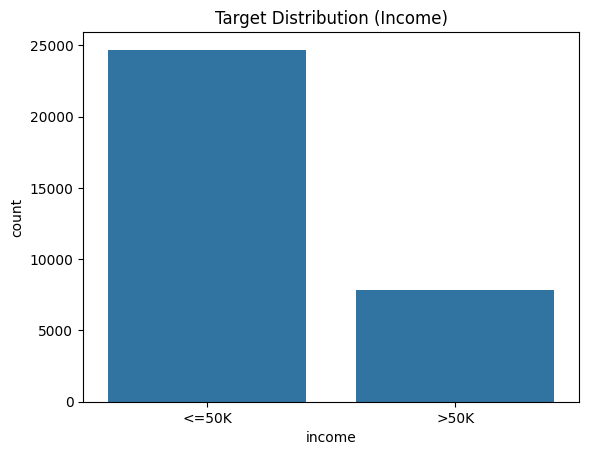

In [19]:
# Income visualization
sns.countplot(x="income", data=data)
plt.title("Target Distribution (Income)")
plt.show()

***Income distribution is imbalanced between <=50K and >50K, requiring imbalance handling techniques.***

In [20]:
# Encoding target variable: <=50K as 0 and >50K as 1
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [21]:
def percent_value_counts(data, feature):
    counts = data.groupby(feature).income.agg(Total_Count= 'count', Higher= 'sum').reset_index()
    counts['Lower'] = counts['Total_Count'] - counts['Higher']
    counts['Total_%'] = round(counts['Total_Count'] / counts['Total_Count'].sum() * 100, 2)
    counts['%Higher'] = round(counts['Higher'] / counts['Total_Count'] * 100, 2)
    counts['%Lower'] = round(counts['Lower'] / counts['Total_Count'] * 100, 2)
    return counts

def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by= 'Total_Count', ascending= False)

    x = np.arange(len(df_EDA[feature]))
    width = 0.25

    plt.figure(figsize =(10, 5))
    plt.bar(x - width, df_EDA['Total_Count'], width, label= 'Total')
    plt.bar(x, df_EDA['Higher'], width, label= 'Higher')
    plt.bar(x + width, df_EDA['Lower'], width, label= 'Lower')

    plt.title(f'{feature} — Total, Higher and Lower')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(x, df_EDA[feature], rotation= 45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df_EDA

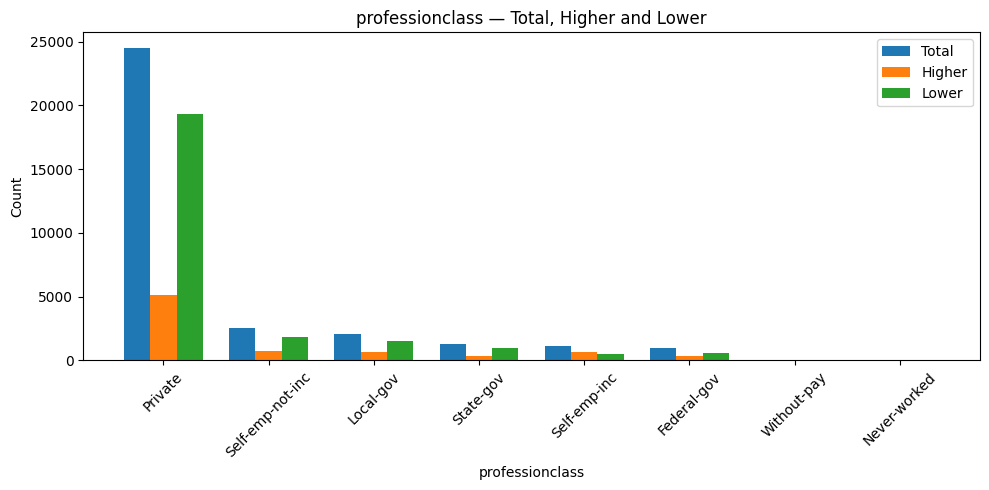

,professionclass,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
3,Private,24509,5152,19357,75.33,21.02,78.98
5,Self-emp-not-inc,2540,724,1816,7.81,28.50,71.50
1,Local-gov,2093,617,1476,6.43,29.48,70.52
6,State-gov,1298,353,945,3.99,27.20,72.80
4,Self-emp-inc,1116,622,494,3.43,55.73,44.27
0,Federal-gov,960,371,589,2.95,38.65,61.35
7,Without-pay,14,0,14,0.04,0.00,100.00
2,Never-worked,7,0,7,0.02,0.00,100.00


In [22]:
univariate_analysis(data, 'professionclass')



- ***Majority of individuals work in the Private sector (~75%), making it the dominant employment class.***
- ***Self-emp-inc group has the highest proportion of high-income individuals (~56%), indicating stronger earning potential among incorporated self-employed people.***
- ***Without-pay and Never-worked groups have no high-income representation.***
- ***Federal Government employees have a relatively higher percentage (~39%) of earning more than 50K compared to other government sectors.***



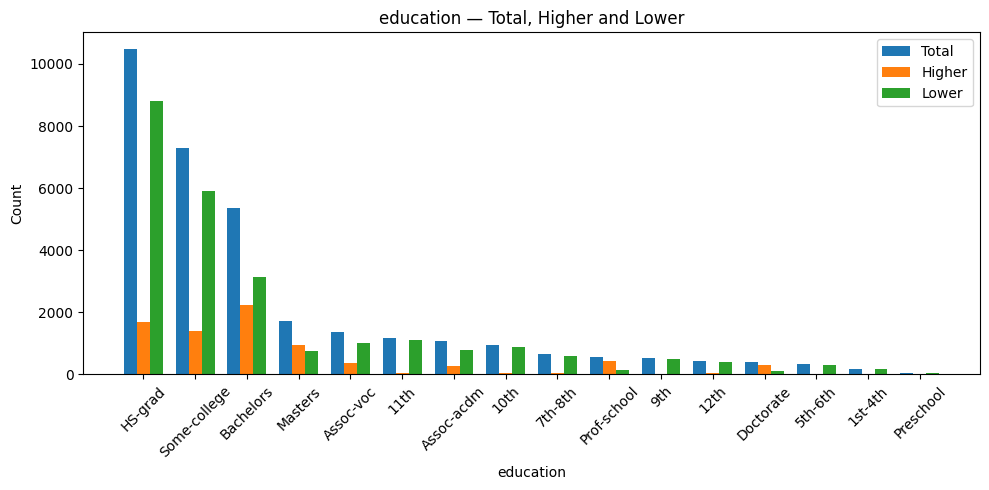

,education,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
11,HS-grad,10494,1674,8820,32.25,15.95,84.05
15,Some-college,7282,1386,5896,22.38,19.03,80.97
9,Bachelors,5353,2221,3132,16.45,41.49,58.51
12,Masters,1722,959,763,5.29,55.69,44.31
8,Assoc-voc,1382,361,1021,4.25,26.12,73.88
1,11th,1175,60,1115,3.61,5.11,94.89
7,Assoc-acdm,1067,265,802,3.28,24.84,75.16
0,10th,933,62,871,2.87,6.65,93.35
5,7th-8th,645,40,605,1.98,6.20,93.80
14,Prof-school,576,423,153,1.77,73.44,26.56


In [23]:
univariate_analysis(data, 'education')

- ***The majority of individuals have completed High School (32%) or have Some College education (22%) making these the most common education levels in the dataset.***
- ***Doctorate (74%) and Professional school (73%) graduates exhibit the highest percentage of high-income earners indicating a strong positive correlation between advanced education and income level.***
- ***Lower education levels (below high school) collectively form less than 10% of the data and show very low high-income representation.***
- ***These percentages highlight the strong correlation between higher education levels and higher income. Advanced degrees such as Doctorates and Professional School qualifications significantly increase the likelihood of earning more tha 50K Conversely, lower education levels such as high school or below are associated with a higher percentage of individuals earning less than 50K.***

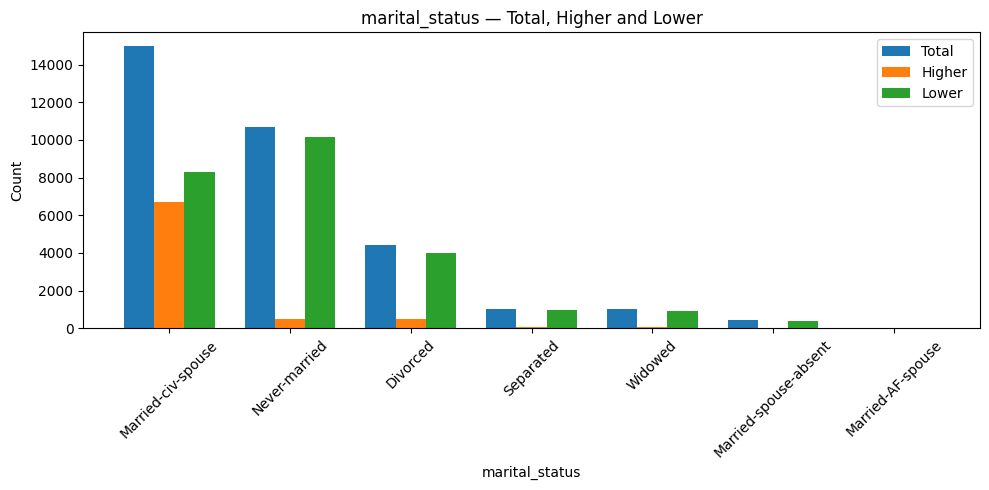

,marital_status,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
2,Married-civ-spouse,14970,6690,8280,46.01,44.69,55.31
4,Never-married,10667,491,10176,32.78,4.60,95.40
0,Divorced,4441,463,3978,13.65,10.43,89.57
5,Separated,1025,66,959,3.15,6.44,93.56
6,Widowed,993,85,908,3.05,8.56,91.44
3,Married-spouse-absent,418,34,384,1.28,8.13,91.87
1,Married-AF-spouse,23,10,13,0.07,43.48,56.52


In [24]:
univariate_analysis(data, 'marital_status')

- ***The majority of individuals are Married-civ-spouse (46%) or Never-married (33%), representing nearly 80% of the dataset.***
- ***Married-civ-spouse individuals show a significantly higher proportion of high-income earners (45%), suggesting that stable marital status may correlate with higher earning capacity.***
- ***Never-married and Divorced groups have lower high-income proportions.***
- ***Other categories such as Separated, Widowed, and Married-spouse-absent together form a small fraction of the data and exhibit consistently low high-income percentages.***
- ***Married-AF-spouse, though rare (<0.1%) shows a relatively high high-income share (43%).***

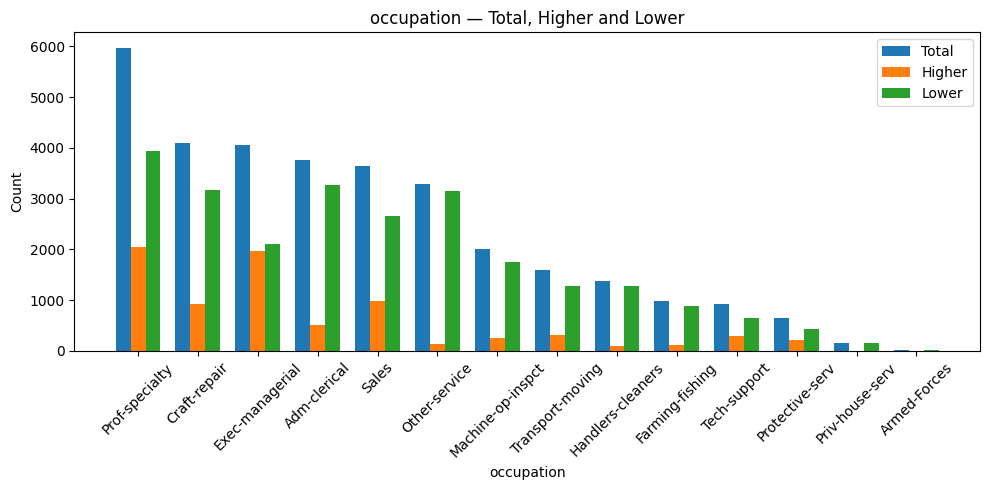

,occupation,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
9,Prof-specialty,5979,2049,3930,18.38,34.27,65.73
2,Craft-repair,4094,929,3165,12.58,22.69,77.31
3,Exec-managerial,4065,1968,2097,12.49,48.41,51.59
0,Adm-clerical,3768,507,3261,11.58,13.46,86.54
11,Sales,3650,983,2667,11.22,26.93,73.07
7,Other-service,3291,137,3154,10.11,4.16,95.84
6,Machine-op-inspct,2000,249,1751,6.15,12.45,87.55
13,Transport-moving,1597,320,1277,4.91,20.04,79.96
5,Handlers-cleaners,1369,86,1283,4.21,6.28,93.72
4,Farming-fishing,992,115,877,3.05,11.59,88.41


In [25]:
univariate_analysis(data, 'occupation')

- ***Exec-managerial (48%) and Prof-specialty (34%) categories exhibit the highest proportion of high-income earners, indicating strong income potential in professional and managerial roles.***
- ***Occupations such as Other-service (4%), Handlers-cleaners (6%), and Priv-house-serv (<1%) have very low high-income percentages, highlighting lower earning capacity in service and manual labor sectors.***
- ***These percentages highlight the correlation between occupation and income levels. High-responsibility roles such as Executive and Managerial positions and Professional Specialties are associated with a higher likelihood of earning more than 50K. Conversely, roles in Private House Service, Handlers & Cleaners and Other Services are associated with a lower likelihood of earning more than 50K.***

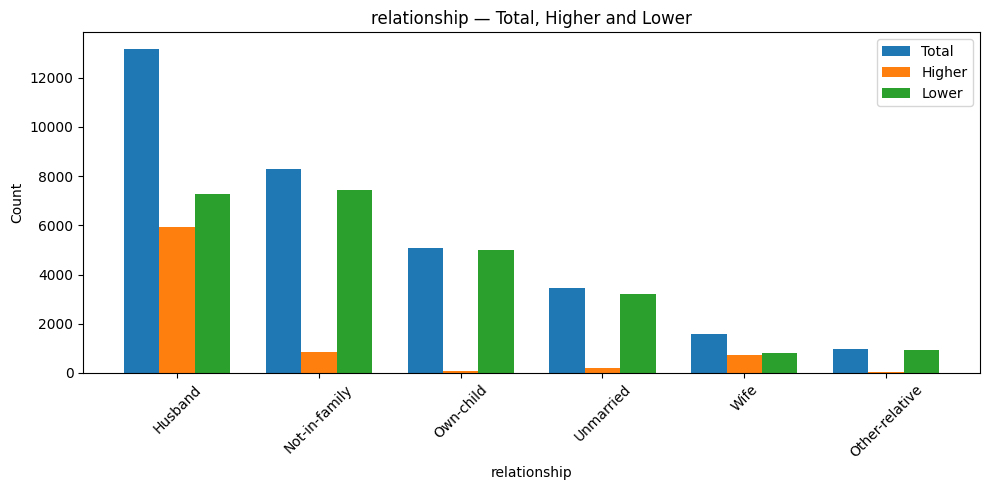

,relationship,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
0,Husband,13187,5916,7271,40.53,44.86,55.14
1,Not-in-family,8292,856,7436,25.48,10.32,89.68
3,Own-child,5064,67,4997,15.56,1.32,98.68
4,Unmarried,3445,218,3227,10.59,6.33,93.67
5,Wife,1568,745,823,4.82,47.51,52.49
2,Other-relative,981,37,944,3.02,3.77,96.23


In [26]:
univariate_analysis(data, 'relationship')

- ***Husbands (45%) and Wives (48%) exhibit the highest proportion of high-income earners, indicating that being in a marital relationship is strongly correlated with higher income levels***
- ***Own Child has the lowest percentage (1.32%) of individuals earning more than 50K, which is expected given their likely younger age and dependency status.***
- ***Individuals Not in a Family, Not Married and Other Relatives have relatively low percentages of earning more than 50K***
- ***These percentages highlight the correlation between relationship status and income levels. Being a Husband or Wife is associated with a higher likelihood of earning more than 50K. Conversely, individuals who are Not in a Family, Not Married or Other Relatives tend to have a lower likelihood of earning more than 50K.***

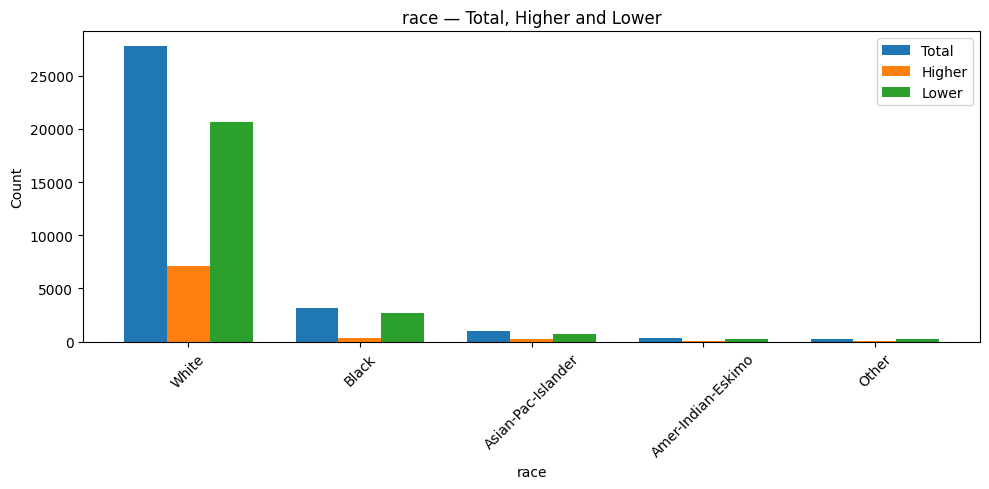

,race,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
4,White,27795,7115,20680,85.43,25.60,74.40
2,Black,3122,387,2735,9.60,12.40,87.60
1,Asian-Pac-Islander,1038,276,762,3.19,26.59,73.41
0,Amer-Indian-Eskimo,311,36,275,0.96,11.58,88.42
3,Other,271,25,246,0.83,9.23,90.77


In [27]:
univariate_analysis(data, 'race')

- ***Most of the people in the dataset are White (85%), followed by Black (10%) while other racial groups make up a small part of the data.***
- ***White (25.6%) and Asian-Pac-Islander (26.6%) groups have a higher share of high-income earners, showing better income outcomes.***
- ***Black (12%), Amer-Indian-Eskimo (12%) and Other (9%) groups have lower percentages of high-income individuals.***

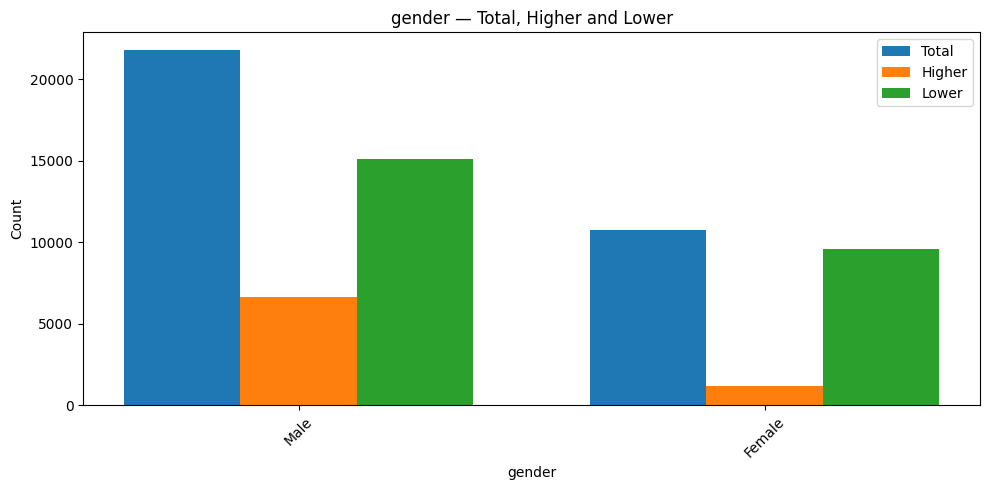

,gender,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
1,Male,21775,6660,15115,66.92,30.59,69.41
0,Female,10762,1179,9583,33.08,10.96,89.04


In [28]:
univariate_analysis(data, 'gender')

- ***Males have a higher percentage (30.6%) of earning more than 50K compared to Females (11%).***
- ***Most females (89%) earn less than 50K, indicating a clear income gap between genders.***
- ***This shows that males tend to have better income levels than females in this dataset.***

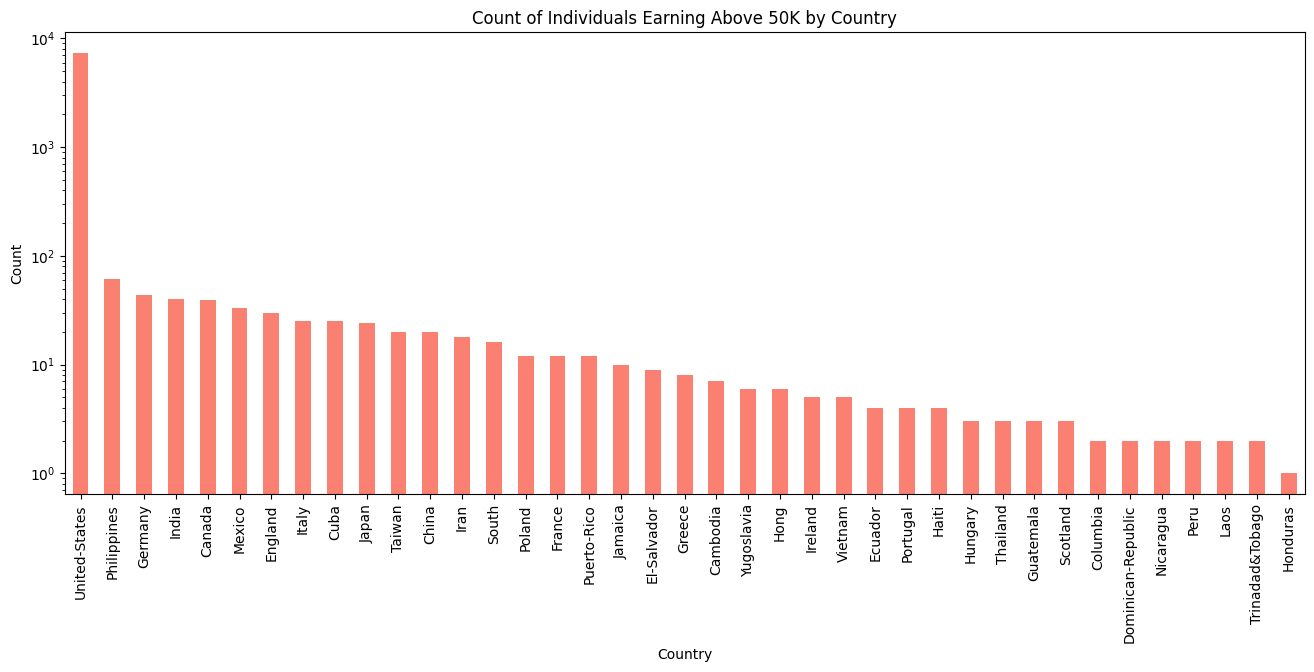

In [29]:
income_by_country = data[data['income'] == 1].groupby('country')['income'].count().sort_values(ascending=False)

# Plotting count of individuals earning >50K for each country
plt.figure(figsize=(16, 6))
income_by_country.plot(kind='bar', color='salmon')
plt.title('Count of Individuals Earning Above 50K by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [30]:
percent_value_counts(data, 'country').sort_values(by= 'Total_Count', ascending= False)

,country,Total_Count,Higher,Lower,Total_%,%Higher,%Lower
38,United-States,29735,7315,22420,91.39,24.60,75.40
25,Mexico,639,33,606,1.96,5.16,94.84
29,Philippines,198,61,137,0.61,30.81,69.19
10,Germany,137,44,93,0.42,32.12,67.88
1,Canada,121,39,82,0.37,32.23,67.77
32,Puerto-Rico,114,12,102,0.35,10.53,89.47
7,El-Salvador,106,9,97,0.33,8.49,91.51
18,India,100,40,60,0.31,40.00,60.00
4,Cuba,95,25,70,0.29,26.32,73.68
8,England,90,30,60,0.28,33.33,66.67


- ***The dataset is heavily dominated by the United States (91%), while all other countries together make up less than 10% of the data.***
- ***India (40%), Iran (41.9%) and France (41.4%) show the highest percentage of high-income earners, indicating strong earning potential.***
- ***Countries like Mexico (5%), Dominican Republic (2.9%) and Columbia (3.4%) have a very low share of high-income individuals.***
- ***Many countries have very small sample sizes (less than 1%), which may not give reliable insights and can be grouped as “Other countries” for modeling purposes.***

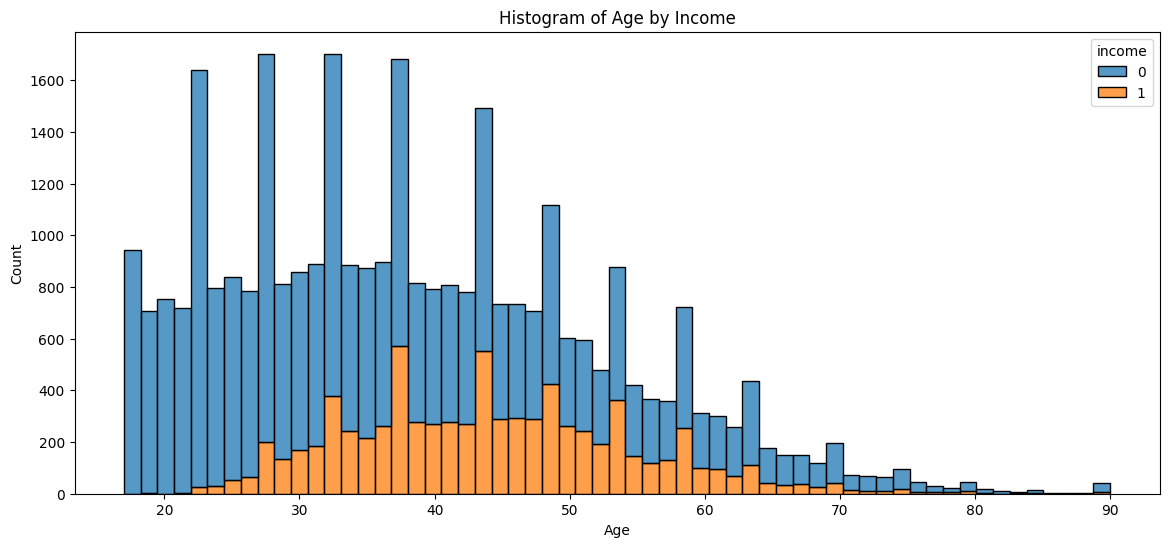

In [31]:
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='age', hue='income', multiple='stack')
plt.title('Histogram of Age by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

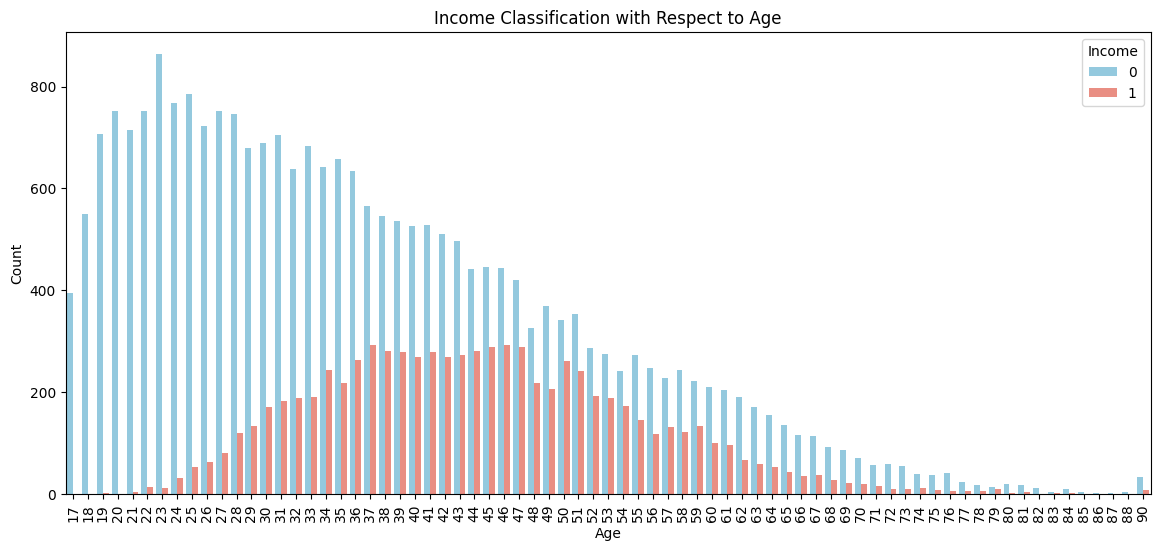

In [32]:
plt.figure(figsize=(14, 6))
sns.countplot(x='age', hue='income', data=data, palette={0: "skyblue", 1: "salmon"})
plt.title('Income Classification with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=90)
plt.show()

- ***The distribution is right-skewed, meaning fewer people are at very high ages.***
- ***A large share of individuals aged 20–30 years fall into the ≤50K income group, indicating a majority of early-career workers earning lower incomes.***
- ***The proportion of individuals earning >50K increases between ages 30–50, reflecting mid-career growth and higher income potential during these years.***
- ***Although fewer individuals earn >50K overall, their share rises steadily with age up to a certain point, showing experience-related income growth.***
- ***Beyond approximately 65 years, there is a sharp drop in higher-income individuals, likely due to retirement or reduced working activity.***


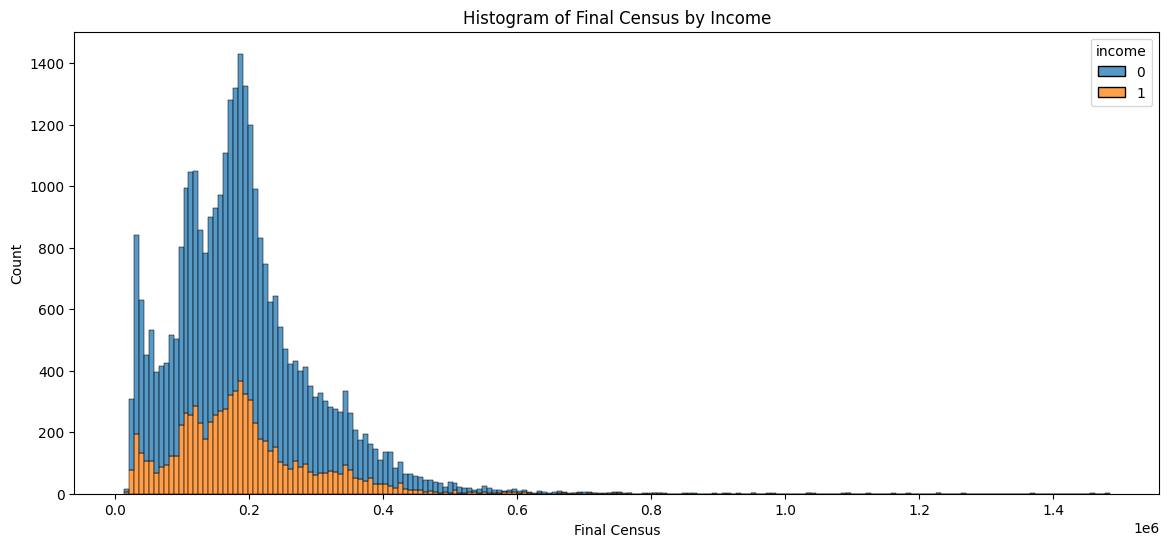

In [33]:
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='final_census', hue='income', multiple='stack')
plt.title('Histogram of Final Census by Income')
plt.xlabel('Final Census')
plt.ylabel('Count')
plt.show()

- ***The distribution of final_census is right-skewed, with most individuals clustered around lower census values.***
- ***Only a small portion of the population has extremely high final_census values, indicating the presence of a few high-value outliers.***

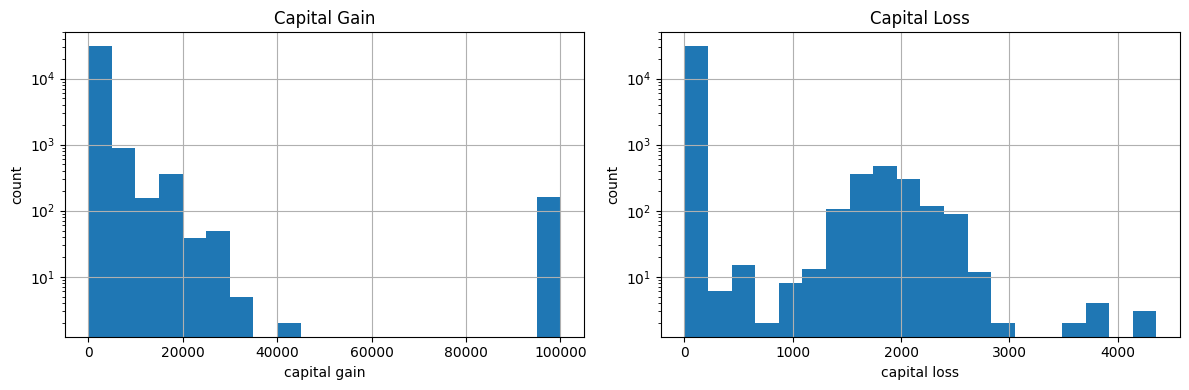

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

data['capital_gain'].hist(ax=axes[0], bins=20)
axes[0].set_title('Capital Gain')
axes[0].set_xlabel('capital gain')
axes[0].set_ylabel('count')
axes[0].set_yscale('log')

data['capital_loss'].hist(ax=axes[1], bins=20)
axes[1].set_title('Capital Loss')
axes[1].set_xlabel('capital loss')
axes[1].set_ylabel('count')
axes[1].set_yscale('log')

plt.tight_layout()

- ***Both capital_gain and capital_loss distributions are highly right-skewed, meaning most individuals report very low or zero values.***
- ***A small fraction of individuals have high capital gains or losses, indicating that substantial investment activity is relatively rare.***
- ***This pattern is common in financial data, where only a few individuals earn or lose large amounts from capital investments.***
- ***The data suggests a low-investment behavior among the majority of individuals in this dataset.***

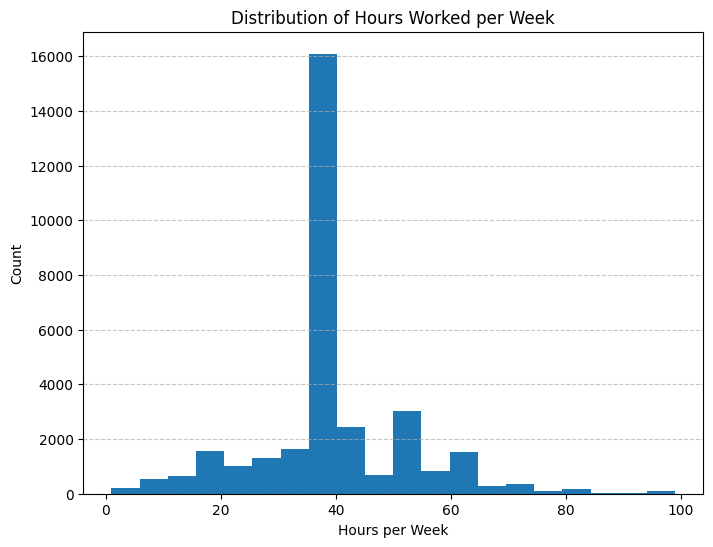

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(data['hours_per_week'], bins=20)
plt.title('Distribution of Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- ***The distribution of hours_per_week appears slightly normal but is highly concentrated around 40 hours, indicating most individuals work standard full-time hours.***
- ***A few individuals report working very long hours (80–100) or very short hours (<20), which can be considered outliers or non-standard work patterns.***
- ***The sharp peak near 40 suggests consistent full-time employment trends in the dataset.***

<Axes: xlabel='final_census', ylabel='Count'>

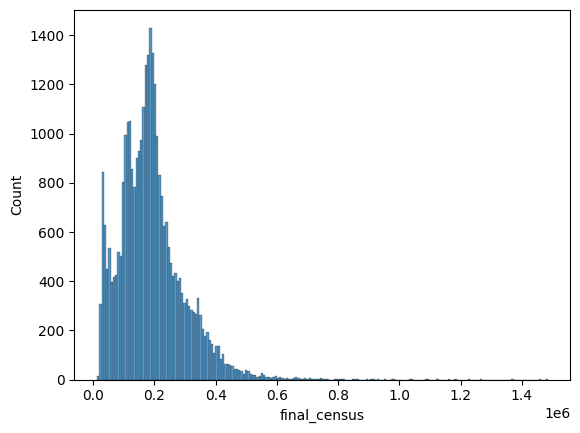

In [36]:
sns.histplot(data['final_census'])

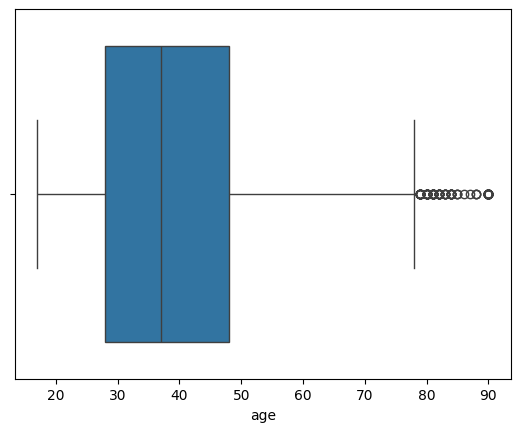

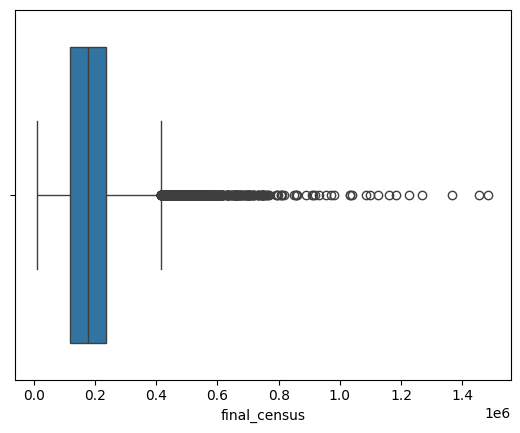

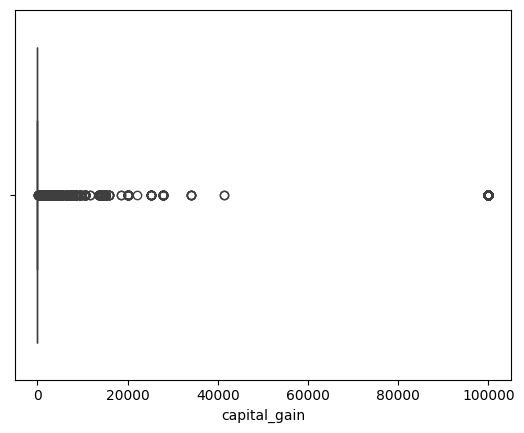

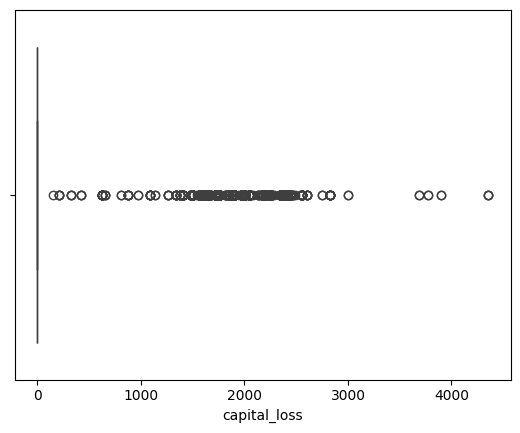

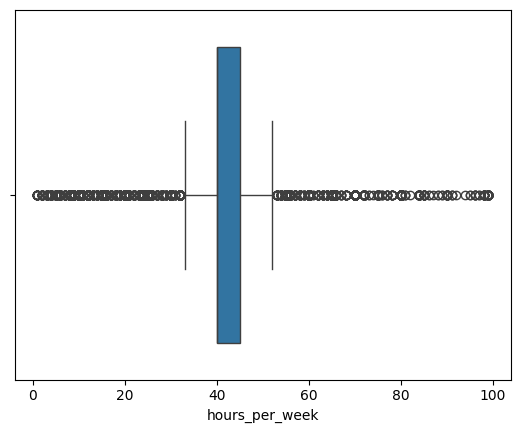

In [37]:
# Visualizing distribution and detecting outliers for numerical features
for col in ['age', 'final_census', 'capital_gain', 'capital_loss', 'hours_per_week']:
  sns.boxplot(x= col, data= data)
  plt.show()

- ***For Age there are a few mild outliers above 70, but they are genuine since people of that age can still be employed.***
- ***For final_census the boxplot shows many extreme high values on the upper side. Distribution is heavily right-skewed, indicating large variations in census.***
- ***For capital_gain the boxplot shows extreme outliers far above the upper whisker. The majority of values are 0 and only a few have very high capital gains (up to 99,999).***
- ***For capital_loss the boxplot shows several upper outliers. Similar to capital gain most values are 0 with few very high losses (up to 4,356).***
- ***For hours_per_week a few individuals report working less than 20 hours per week. Some individuals report working up to 80–100 hours per week, which is unusually high.***

# **Preprocessing**

## **1. Outlier Treatment**

In [38]:
# Applying log transformation to reduce right skewness in numeric columns
log_cols = ['final_census', 'capital_gain', 'capital_loss']

for c in log_cols:
    data[c] = np.log1p(data[c])

# Capping extreme values in 'hours_per_week' using winsorization (1st–99th percentile)
low, high = data['hours_per_week'].quantile([0.01, 0.99])
data['hours_per_week'] = data['hours_per_week'].clip(lower=low, upper=high)

- ***We handled outliers using log transformation for final_census, capital_gain and capital_loss to reduce right skewness and winsorization (1st–99th percentile) for hours_per_week to cap extreme values and keep the data within a realistic range.***

## **2. Encoding**

In [39]:
# Handle rare categories in categorical features

data['professionclass'] = data['professionclass'].replace({'Without-pay': 'Other', 'Never-worked': 'Other'})

data['marital_status'] = data['marital_status'].replace('Married-AF-spouse', 'Married-civ-spouse')

country_counts = data['country'].value_counts()
data['country'] = data['country'].apply(lambda x: x if country_counts[x] >= 100 else 'Other')

data['occupation'] = data['occupation'].replace('Armed-Forces', 'Other-service')


- ***Grouped countries with fewer than 100 records into “Other” for balance, merged “Armed-Forces” with “Other-service,” combined “Without-pay” and “Never-worked” into “Other” and mapped “Married-AF-spouse” to “Married-civ-spouse” for consistency and reduced sparsity.***

In [40]:
# Dropping education (since it’s redundant with education_num)
data.drop('education', axis=1, inplace= True)

In [41]:
# Creating separate copies for linear and tree-based model preprocessing
data_linear = data.copy()
data_tree = data.copy()

- ***Created two copies, one for linear models with scaling and one-hot encoding, and another for tree-based models with label encoding.***

In [42]:
# Scaling and one hot encoding for linear dataset
data_linear = pd.get_dummies(data_linear, drop_first=True, dtype= 'int')

scaler = StandardScaler()
num_cols = ['age', 'final_census', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data_linear[num_cols] = scaler.fit_transform(data_linear[num_cols])
data_linear.head()

,age,final_census,education_num,capital_gain,capital_loss,hours_per_week,income,professionclass_Local-gov,professionclass_Other,professionclass_Private,professionclass_Self-emp-inc,professionclass_Self-emp-not-inc,professionclass_State-gov,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,country_El-Salvador,country_Germany,country_India,country_Mexico,country_Other,country_Philippines,country_Puerto-Rico,country_United-States
0,0.030390,-1.150464,1.134777,2.830199,-0.22116,-0.032940,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0.836973,-1.036148,1.134777,-0.299391,-0.22116,-2.294589,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,-0.042936,0.471863,-0.420679,-0.299391,-0.22116,-0.032940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,1.056950,0.606259,-1.198407,-0.299391,-0.22116,-0.032940,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,-0.776193,1.186371,1.134777,-0.299391,-0.22116,-0.032940,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


- ***Applied one-hot encoding to categorical features and scaled numerical columns using StandardScaler for normalization.***

In [43]:
# Label encoding for tree-based models
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data_tree.select_dtypes(include='object').columns:
    data_tree[col] = le.fit_transform(data_tree[col])
data_tree.head()

,age,professionclass,final_census,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,income
0,39,6,11.258253,13,3,0,1,4,1,7.684784,0.0,40,8,0
1,50,5,11.330348,13,1,2,0,4,1,0.000000,0.0,13,8,0
2,38,3,12.281398,9,0,4,1,4,1,0.000000,0.0,40,8,0
3,53,3,12.366157,7,1,4,0,2,1,0.000000,0.0,40,8,0
4,28,3,12.732013,13,1,8,5,2,0,0.000000,0.0,40,5,0


- ***Applied label encoding to convert categorical features into numeric form for tree-based models.***

## **3. Splitting Data and Handling Class Imbalance**

In [44]:
# Linear Model Dataset
X_linear = data_linear.drop('income', axis=1)
y_linear = data_linear['income']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42, stratify=y_linear)

smote_lin = SMOTE(random_state=42)
X_train_lin_res, y_train_lin_res = smote_lin.fit_resample(X_train_lin, y_train_lin)


# Tree Model Dataset
X_tree = data_tree.drop('income', axis=1)
y_tree = data_tree['income']

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42, stratify=y_tree)

smote_tree = SMOTE(random_state=42)
X_train_tree_res, y_train_tree_res = smote_tree.fit_resample(X_train_tree, y_train_tree)


# Check class balance
print("Linear Data Balance Before:", y_train_lin.value_counts().to_dict())
print("Linear Data Balance After:", y_train_lin_res.value_counts().to_dict())
print("\nTree Data Balance Before:", y_train_tree.value_counts().to_dict())
print("Tree Data Balance After:", y_train_tree_res.value_counts().to_dict())


Linear Data Balance Before: {0: 19758, 1: 6271}
Linear Data Balance After: {0: 19758, 1: 19758}

Tree Data Balance Before: {0: 19758, 1: 6271}
Tree Data Balance After: {0: 19758, 1: 19758}


- ***To improve model fairness and performance, SMOTE (Synthetic Minority Oversampling Technique) was applied to both datasets after splitting.
This ensures both classes are balanced for training.***

# **Modeling**

#### In this project, our goal is to predict whether a person earns more than $50K or not based on demographic and work-related features. It is a binary classification problem. Since there are many possible models to try, testing them manually would be time-consuming and inconsistent. Therefore, we built a model comparison setup to evaluate multiple algorithms together in a consistent and systematic way.

In [45]:
# Function to evaluate multiple classification models on train and test sets.
# Calculating key metrics like Accuracy, Precision, Recall, F1, Log Loss, and ROC AUC.
# Returning a DataFrame for easy comparison of model performance.

def compare_classification_models(models,
                                  X_train_lin, y_train_lin, X_test_lin, y_test_lin,
                                  X_train_tree, y_train_tree, X_test_tree, y_test_tree):
    results = []

    for name, (model, mtype) in models.items():
        if mtype == 'linear':
            Xtr, ytr, Xte, yte = X_train_lin, y_train_lin, X_test_lin, y_test_lin
        elif mtype == 'tree':
            Xtr, ytr, Xte, yte = X_train_tree, y_train_tree, X_test_tree, y_test_tree
        else:
            raise ValueError(f"Unknown model type '{mtype}' for model {name}")

        model.fit(Xtr, ytr)

        y_tr_pred = model.predict(Xtr)
        y_te_pred = model.predict(Xte)

        if hasattr(model, "predict_proba"):
            y_tr_prob = model.predict_proba(Xtr)[:, 1]
            y_te_prob = model.predict_proba(Xte)[:, 1]
        else:
            y_tr_prob = None
            y_te_prob = None

        train_acc = accuracy_score(ytr, y_tr_pred)
        test_acc  = accuracy_score(yte, y_te_pred)

        train_prec = precision_score(ytr, y_tr_pred, zero_division=0)
        test_prec  = precision_score(yte, y_te_pred, zero_division=0)

        train_rec = recall_score(ytr, y_tr_pred, zero_division=0)
        test_rec  = recall_score(yte, y_te_pred, zero_division=0)

        train_f1 = f1_score(ytr, y_tr_pred, zero_division=0)
        test_f1  = f1_score(yte, y_te_pred, zero_division=0)

        train_logloss = log_loss(ytr, y_tr_prob) if y_tr_prob is not None else None
        test_logloss  = log_loss(yte, y_te_prob) if y_te_prob is not None else None

        roc_train = roc_auc_score(ytr, y_tr_prob) if y_tr_prob is not None else None
        roc_test  = roc_auc_score(yte, y_te_prob) if y_te_prob is not None else None

        results.append({
            "Model": name,
            "Type": mtype,
            "Train_Accuracy": train_acc,
            "Test_Accuracy": test_acc,
            "Train_Precision": train_prec,
            "Test_Precision": test_prec,
            "Train_Recall": train_rec,
            "Test_Recall": test_rec,
            "Train_LogLoss": train_logloss,
            "Test_LogLoss": test_logloss,
            "Train_F1": train_f1,
            "Test_F1": test_f1,
            "ROC_Train": roc_train,
            "ROC_Test": roc_test
        })

    return pd.DataFrame(results)


In [46]:
# Define models
models = {
    "LogisticRegression": (LogisticRegression(), 'linear'),
    "SVC_linear": (SVC(kernel='linear', probability=True), 'linear'),
    "SVC_rbf": (SVC(kernel='rbf', probability=True), 'linear'),
    "KNN": (KNeighborsClassifier(), 'linear'),
    "DecisionTree": (DecisionTreeClassifier(), 'tree'),
    "RandomForest": (RandomForestClassifier(), 'tree'),
    "GradientBoosting": (GradientBoostingClassifier(), 'tree'),
    "AdaBoost": (AdaBoostClassifier(), 'tree'),
    "XGBoost": (XGBClassifier(eval_metric='auc', use_label_encoder=False), 'tree')
}

# Compare models
df_metrics = compare_classification_models(
    models,
    X_train_lin_res, y_train_lin_res, X_test_lin, y_test_lin,
    X_train_tree_res, y_train_tree_res, X_test_tree, y_test_tree
)

df_metrics.sort_values('Test_F1', ascending=False).reset_index(drop=True)

,Model,Type,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_LogLoss,Test_LogLoss,Train_F1,Test_F1,ROC_Train,ROC_Test
0,XGBoost,tree,0.900294,0.846958,0.881819,0.643287,0.924486,0.818878,0.236902,0.323484,0.902649,0.720539,0.966586,0.922314
1,RandomForest,tree,0.999975,0.849877,0.999949,0.664992,1.000000,0.759566,0.069775,0.407908,0.999975,0.709140,1.000000,0.905204
2,GradientBoosting,tree,0.850972,0.824985,0.830482,0.596059,0.881972,0.848852,0.332671,0.353445,0.855453,0.700342,0.932630,0.919198
3,SVC_rbf,linear,0.862840,0.819453,0.832854,0.585696,0.907885,0.856505,0.314584,0.370906,0.868752,0.695675,0.938843,0.908106
4,LogisticRegression,linear,0.839154,0.809619,0.819948,0.572627,0.869167,0.827168,0.358811,0.395059,0.843841,0.676755,0.917532,0.897307
5,AdaBoost,tree,0.826779,0.800860,0.802426,0.556152,0.867041,0.859056,0.535952,0.536057,0.833483,0.675188,0.908618,0.901029
6,SVC_linear,linear,0.833232,0.800553,0.807865,0.557010,0.874431,0.841199,0.363764,0.397725,0.839831,0.670224,0.915737,0.895641
7,KNN,linear,0.903811,0.788722,0.856263,0.541434,0.970544,0.804209,0.189938,2.415086,0.909828,0.647164,0.979097,0.856591
8,DecisionTree,tree,0.999975,0.802704,1.000000,0.574423,0.999949,0.698980,0.000035,7.111256,0.999975,0.630610,1.000000,0.767304


## Metrics for comparison

### **Accuracy**
- ***Shows proportion of correctly predicted samples.***
- ***Not reliable here because the target is severely imbalanced — a model may predict only the majority and still get high accuracy.***

### **Precision**
- ***Out of all predicted positives, how many are actually positive.***
- ***High precision means fewer false positives — we don’t wrongly predict low-income people as high-income.***

### **Recall**
- ***Out of all actual positives, how many are predicted correctly.***
- ***High recall ensures we don’t miss actual high-income individuals.***

### **F1 Score**
- ***Harmonic mean of precision and recall.***
- ***Important for imbalanced data as it balances false positives and false negatives.***

### **Log Loss**
- ***Measures how close predicted probabilities are to true labels.***
- ***Lower is better — shows model confidence and calibration.***

### **ROC AUC Score**
- ***Measures how well the model separates the two classes.***
- ***More useful than accuracy for imbalanced datasets.***

### ***Because the target is severely imbalanced, we’ll focus mainly on F1 Score and ROC AUC instead of accuracy.***

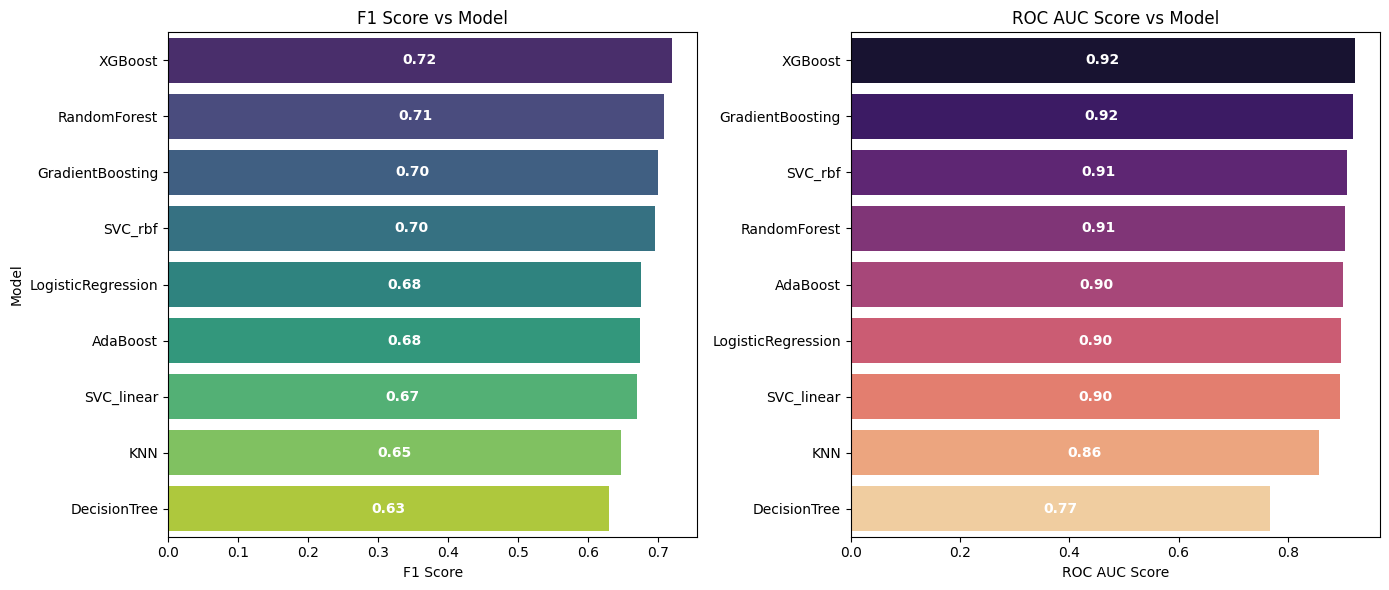

In [47]:
# Plotting metrics for comparison

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
df_f1 = df_metrics.sort_values('Test_F1', ascending= False)
ax1 = sns.barplot(x= 'Test_F1', y= 'Model', data= df_f1, palette= 'viridis')
plt.title('F1 Score vs Model')
plt.xlabel('F1 Score')
plt.ylabel('Model')

for p in ax1.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax1.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.subplot(1,2,2)
df_roc = df_metrics.sort_values('ROC_Test', ascending= False)
ax2 = sns.barplot(x= 'ROC_Test', y= 'Model', data= df_roc, palette= 'magma')
plt.title('ROC AUC Score vs Model')
plt.xlabel('ROC AUC Score')
plt.ylabel('')

for p in ax2.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.tight_layout()
plt.show()


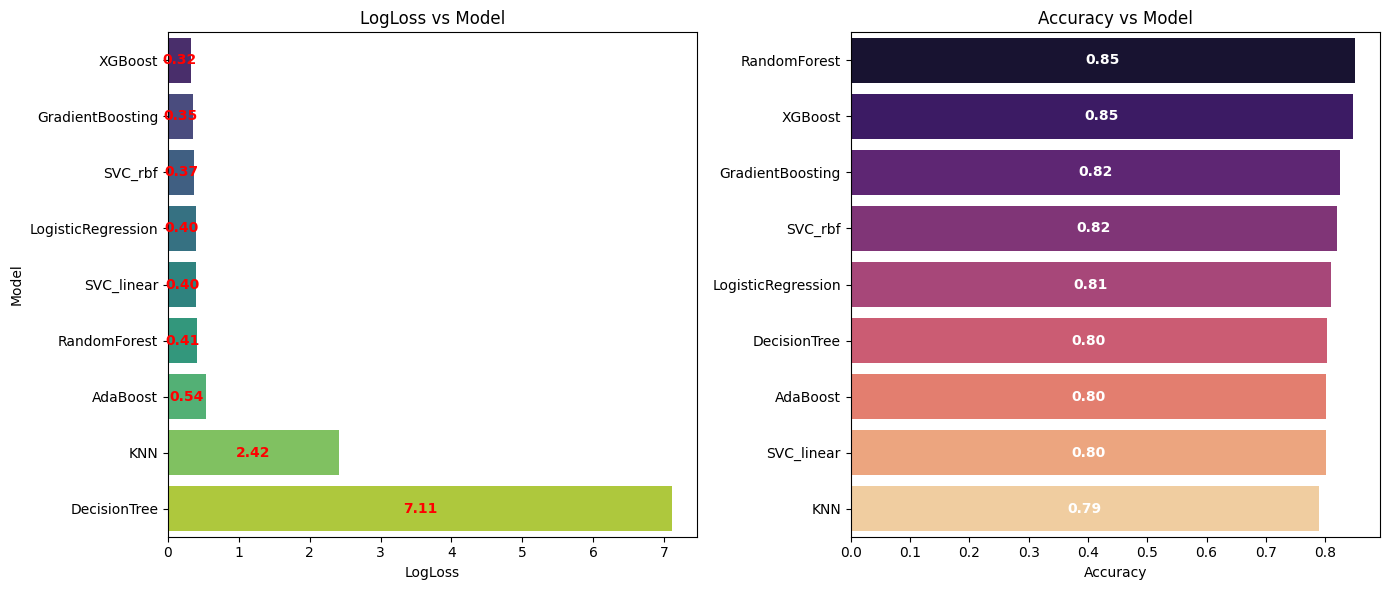

In [48]:
# Plotting metrics for comparison

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
df_recall = df_metrics.sort_values('Test_LogLoss')
ax1 = sns.barplot(x= 'Test_LogLoss', y= 'Model', data= df_recall, palette= 'viridis')
plt.title('LogLoss vs Model')
plt.xlabel('LogLoss')
plt.ylabel('Model')

for p in ax1.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax1.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'r', fontweight= 'bold')

plt.subplot(1,2,2)
df_precision = df_metrics.sort_values('Test_Accuracy', ascending= False)
ax2 = sns.barplot(x= 'Test_Accuracy', y= 'Model', data= df_precision, palette= 'magma')
plt.title('Accuracy vs Model')
plt.xlabel('Accuracy')
plt.ylabel('')

for p in ax2.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(width/2, y, f"{width:.2f}", va= 'center', ha= 'center', color= 'white', fontweight= 'bold')

plt.tight_layout()
plt.show()


## Conclusion

- ***Multiple models were compared using Test F1 Score and ROC AUC to handle the severe class imbalance effectively.***
- ***Models showing strong generalization and balanced performance between F1 and ROC AUC were shortlisted.***
- ***Among all tested models, XGBoost Classifier achieved the best trade-off between precision, recall and ROC AUC, making it the most reliable for imbalanced classification.***
- ***Therefore XGBoost was selected for hyperparameter tuning and further optimization to improve minority class detection.***

In [49]:
xgb_best = XGBClassifier(n_estimators= 300,
                         max_depth= 6,
                         learning_rate= 0.05,
                         subsample = 0.9,
                         colsample_bytree=0.9,
                         min_child_weight=6,
                         reg_alpha=1.4,
                         reg_lambda=1.5)

xgb_best.fit(X_train_tree_res, y_train_tree_res)
y_pred_train = xgb_best.predict(X_train_tree_res)
y_pred_train_proba = xgb_best.predict_proba(X_train_tree_res)[:,1]
y_pred_test = xgb_best.predict(X_test_tree)
y_pred_test_proba = xgb_best.predict_proba(X_test_tree)[:,1]

print("Train Accuracy:", round(accuracy_score(y_train_tree_res, y_pred_train), 2))
print("Test Accuracy:", round(accuracy_score(y_test_tree, y_pred_test), 2))
print("Train F1 Score:", round(f1_score(y_train_tree_res, y_pred_train), 2))
print("Test F1 Score:", round(f1_score(y_test_tree, y_pred_test), 2))
print("Train ROC-AUC:", round(roc_auc_score(y_train_tree_res, y_pred_train_proba), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test_tree, y_pred_test_proba), 2))
print("Test Recall Score:", round(recall_score(y_test_tree, y_pred_test), 2))

Train Accuracy: 0.88
Test Accuracy: 0.84
Train F1 Score: 0.88
Test F1 Score: 0.72
Train ROC-AUC: 0.95
Test ROC-AUC: 0.92
Test Recall Score: 0.84


In [50]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

acc_scores = cross_val_score(xgb_best, X_train_tree_res, y_train_tree_res, cv= cv, scoring= 'accuracy')
f1_scores = cross_val_score(xgb_best, X_train_tree_res, y_train_tree_res, cv= cv, scoring= 'f1')
roc_scores = cross_val_score(xgb_best, X_train_tree_res, y_train_tree_res, cv= cv, scoring= 'roc_auc')

print("5-Fold Cross-Validation Results:")
print(f"Mean Accuracy : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")
print(f"Mean F1 Score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean ROC-AUC  : {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")

5-Fold Cross-Validation Results:
Mean Accuracy : 0.865 ± 0.003
Mean F1 Score : 0.868 ± 0.003
Mean ROC-AUC  : 0.943 ± 0.001


#### After a lot of tuning and experimentation this is the performance of our final XGBoost model. On the train-test split the model got about 88% accuracy on training data and 84% on the test data so the difference is reasonable and shows it’s not overfitting too much. The F1 score is around 0.72 for test which means the model is balancing precision and recall pretty well. Importantly the ***ROC-AUC on test data is 0.92*** so the model is good at distinguishing between the two classes and the ***recall is 0.84*** meaning it correctly identifies 84% of the positive cases.

#### To make sure the model is stable and not just performing well on this particular split we did a 5-fold cross-validation. The results were very consistent: the mean accuracy was 0.865 ± 0.003, mean F1 score 0.868 ± 0.003 and ***mean ROC-AUC 0.943 ± 0.001***. The small standard deviation shows that the model performs reliably across different subsets of data.

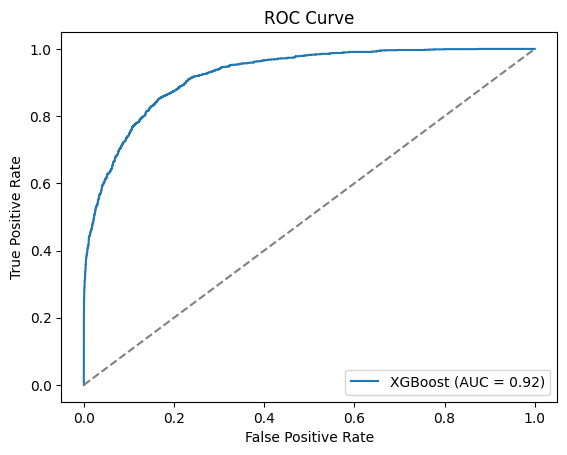

In [51]:
# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test_tree, y_pred_test_proba)
plt.plot(fpr, tpr, label= f'XGBoost (AUC = {roc_auc_score(y_test_tree, y_pred_test_proba):.2f})')
plt.plot([0,1], [0,1],'--', color= 'grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### The ROC curve shows how well our XGBoost model distinguishes between individuals earning more than \$50K and those earning less than \$50K. An ***AUC of 0.92***  indicates that the model has a good ability to correctly rank high-income individuals above low-income ones most of the time.The curve lying well above the diagonal line confirms that the model performs significantly better than random guessing, showing it is reliable and effective in identifying high-income individuals.

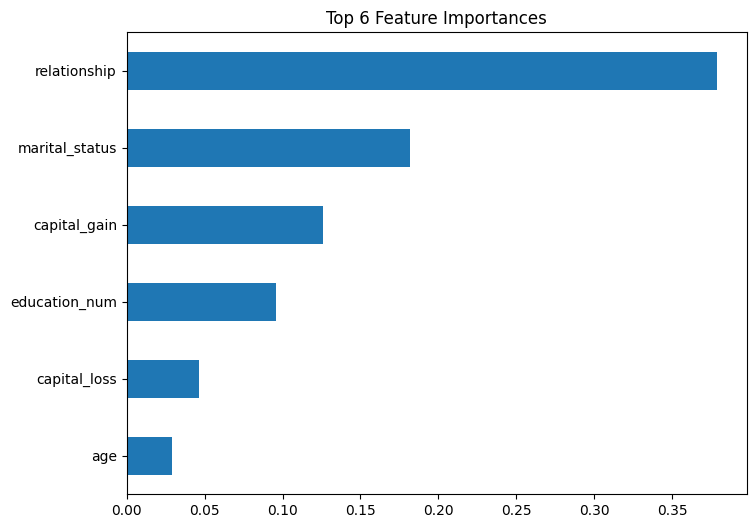

In [52]:
# Feature Importances

feat_importance = pd.Series(xgb_best.feature_importances_, index= X_train_tree_res.columns)
feat_importance.sort_values().tail(6).plot(kind= 'barh', figsize= (8,6), title= 'Top 6 Feature Importances')
plt.show()


- The model reveals that **relationship status** is the most influential factor in determining income, indicating strong social and dependency patterns linked to earning potential.
- **Marital status** and **capital gain** are also key contributors, reflecting how financial stability and asset income influence higher earnings.
- **Education level** plays a major role, reinforcing that higher education often leads to better-paying jobs.
- **Capital loss** and **age** further impact predictions suggesting that both financial activity and career stage are important in explaining income differences.
